Saving bank-additional-full.csv to bank-additional-full (2).csv
✅ Dataset Loaded Successfully

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999  

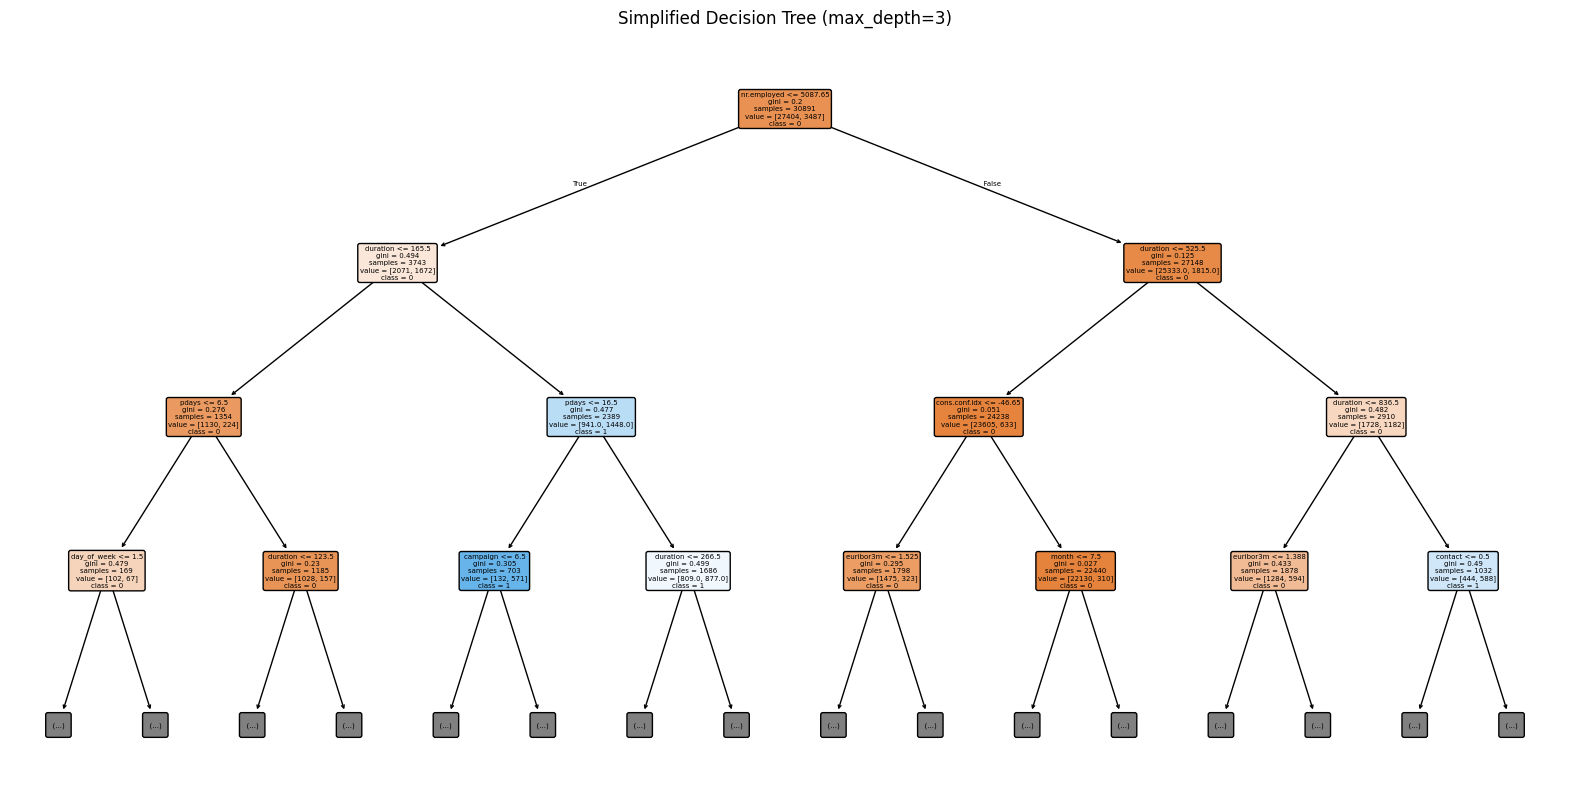

In [7]:
# ✅ TASK 3: Predicting Purchase using Decision Tree - Bank Marketing Dataset

# 📦 Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ✅ Step 1: Upload the dataset (for Google Colab users)
try:
    from google.colab import files
    uploaded = files.upload()
except:
    print("📂 If you're using Jupyter, place 'bank-additional-full.csv' in the same folder as this notebook.")

# ✅ Step 2: Load the dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')
print("✅ Dataset Loaded Successfully\n")
print(df.head())

# ✅ Step 3: Encode all categorical columns
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le

# ✅ Step 4: Define features (X) and target (y)
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# ✅ Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ✅ Step 6: Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ Step 7: Predict and evaluate
y_pred = model.predict(X_test)

print("\n✅ MODEL EVALUATION METRICS")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Step 8: Visualize Decision Tree
# Visualize a smaller tree (only first 3 levels)
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in model.classes_],
    filled=True,
    rounded=True,
    max_depth=3  # ✅ Limit depth for faster render
)
plt.title("Simplified Decision Tree (max_depth=3)")
plt.show()

